<a href="https://colab.research.google.com/github/davidproton4u/AI-sampleassng/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
class ScratchLogisticRegression():
       
    def __init__(self, num_iter=100, lr=0.01, C=1,
                 random_state=None,bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _linear_combination(self,X):
        
        x1 = X
        
        # Create x0 (bias term)
        if self.bias == True:
            x0 = np.ones(x1.shape[0])
        else:
            x0 = np.zeros(x1.shape[0])
        
        return np.concatenate([x0.reshape(-1,1),x1],axis=1)
        
        
    def _hypothetical_function(self,X):
       
        x = X
        z = np.dot(x,self.theta)
        
        return 1/(1+np.exp(-z))
    
    def _gradient_descent(self, X, error):
       
        # tmp to add regularization (lamda) to i=1,2,...
        self.tmp = np.append(0,np.ones(X.shape[1]-1))
        self.theta -= self.lr*(np.dot(error,X) + self.tmp*self.lamda*self.theta)/len(X)
        
        #self.theta -= self.lr*np.dot(error,X)/len(X)
        #self.theta[1:] -= self.lr*self.lamda*self.theta[1:]/len(X)
        
    def _loss_function(self, y, yhat):
               
        return np.mean(-y*np.log(yhat) -(1-y)*np.log(1-yhat))+0.5*self.lamda*np.mean(self.theta[1:]**2)
        
    def fit(self, X, y, X_val=False, y_val=False):
        
        self.ylabel = np.unique(y)
        
        y = np.where(y==self.ylabel[0],0,1)
        
        if (type(y_val) != bool):
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # linear combination
        X = self._linear_combination(X)
        
        # Give the initial value of parameter θ as a random number.
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # Predicted probability
            yhat = self._hypothetical_function(X)
            
            # measurement error
            error = yhat - y            
            self.loss[i] = self._loss_function(y,yhat)
            
            if (type(X_val) != bool):
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # Outputs the learning process when verbose is set to true.
            if self.verbose:
                print('n_iter:', i,
                      'loss:',self.loss[i],
                      'theta:',self.theta)
      
        np.save('theta', self.theta)
        
            

    def predict(self, X):
      
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)

In [4]:
x1=np.array([0,1,2,3,4,5,6,7,8])
y=np.array([2,4,2,1,6,7,8,5,2])
x0= np.ones(x1.shape[0])
X=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
print('x:\n',X)

x:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


In [5]:
theta=np.random.randn(X.shape[1])
print('theta:\n',theta)

theta:
 [ 0.01910012 -0.07109049]


In [6]:
z=np.dot(X,theta)
print('z:\n',z)

z:
 [ 0.01910012 -0.05199037 -0.12308087 -0.19417136 -0.26526185 -0.33635235
 -0.40744284 -0.47853334 -0.54962383]


In [7]:
y=1/(1+np.exp(-z))
print('y:\n',y)

y:
 [0.50477489 0.48700533 0.46926857 0.4516091  0.43407067 0.41669581
 0.39952544 0.38259852 0.36595169]


In [8]:
print

<function print>

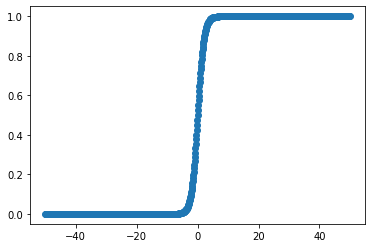

In [9]:
z1=np.arange(-50,50,0.1)
y1=1/(1+np.exp(-z1))

plt .scatter(z1,y1)
plt.show;
 

In [10]:
X.shape

(9, 2)

In [11]:
y.shape

(9,)

In [12]:
x1=np.array([2,1,5,6,4]).reshape(-1,1)
x0= np.ones(x1.shape[0])
x=np.concatenate([x0.reshape(-1,1),x1.reshape(-1,1)],axis=1)
y=np.array([0.4,0.5,0.2,0.1,0.9])
yhat=np.where(y<0.5,0,1)
y_test=np.array([1,1,0,0,1])
print('x:\n',x)
print('y:\n',y)
print('yhat:\n',yhat)
print('ytest:\n',y_test)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]
y:
 [0.4 0.5 0.2 0.1 0.9]
yhat:
 [0 1 0 0 1]
ytest:
 [1 1 0 0 1]


In [13]:
theta=np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [0.39685055 0.53705854]


In [14]:
error=yhat-y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [15]:
lm=np.array([0,1])
theta*lm

array([0.        , 0.53705854])

In [16]:
0.01*np.dot(error,x)/len(x)+theta*lm/len(x)

array([-0.002     ,  0.10341171])

In [17]:
theta-=(0.01*np.dot(error,x)/len(x)+theta*lm/len(x))
print ('theta:\n', theta)

theta:
 [0.39885055 0.43364683]


In [18]:
theta-=(0.01*np.dot(error,x)/len(x)+theta*lm/len(x))
theta

array([0.40085055, 0.35091747])

In [19]:
x1=np.array([2,1,5,6,4]).reshape(-1,1)
x2=np.array([2,1,5,2,4]).reshape(-1,1)
y=np.array([1,1,0,0,1])
print('x1:\n',x1)
print('x2:\n',x2)
print('y:\n',y)


x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x2:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 1 0 0 1]


In [21]:
import numpy as np
clf=ScratchLogisticRegression()
clf.fit(x1,y,x1,y)
y_proba=clf.predict_proba(x2)
y_pred=clf.predict(x2)

In [22]:
print('y_proba:\n', y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.45710871 0.47851476 0.39413358 0.45710871 0.41484405]
y_pred:
 [0 0 0 0 0]


In [23]:
y1=np.ones(99)
y2=np.zeros(99)
yh=np.arange(0.01,1.0,0.01)

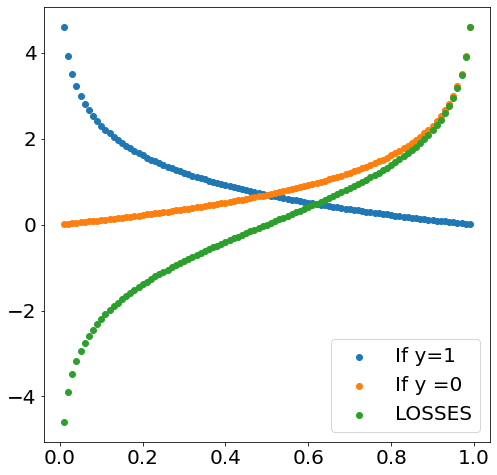

In [29]:
j1=-y1*np.log(yh)-(1-y1)*np.log(1-yh)
j2=y2*np.log(yh)-(1-y2)*np.log(1-yh)
j=y1*np.log(yh)-(1-y2)*np.log(1-yh)

fig,ax=plt.subplots(figsize=(8,8))
plt.rcParams["font.size"]=20
plt.scatter(yh,j1,label='If y=1')
plt.scatter(yh,j2,label='If y =0')
plt.scatter(yh,j,label='LOSSES')
plt.legend();

In [30]:
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target.reshape(-1,1)

In [31]:
iris=np.concatenate([data,target],axis=1)
iris=pd.DataFrame(iris)
iris.shape

(150, 5)

In [32]:
disp=False
if disp==True:
   sns.pairplot(iris,palette='tab10');

In [33]:
iris_X=iris.loc[iris[4]!=0,2:3].values
iris_y=iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [34]:
from sklearn.model_selection  import train_test_split
X=iris_X
y=iris_y
X_train,X_valid,y_train,y_valid=\
train_test_split(X,y,train_size=0.8,random_state=0)
print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape',X_valid.shape)
print('y_valid.shape',y_valid.shape)

X_train.shape: (80, 2)
y_train.shape: (80,)
X_valid.shape (20, 2)
y_valid.shape (20,)


In [35]:
np.unique(y)

array([1., 2.])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std= scaler.transform(X_train)
X_valid_std= scaler.transform(X_valid)

In [37]:
clf=ScratchLogisticRegression(num_iter=500,lr=0.01,C=0.01,verbose=False)
clf.fit(X_train_std,y_train,X_valid_std,y_valid)
y_pred=clf.predict(X_valid_std)
y_prob=clf.predict_proba(X_valid_std)

In [38]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1.])

In [39]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [40]:
y_proba

array([0.45710871, 0.47851476, 0.39413358, 0.45710871, 0.41484405])

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score
accuracy=accuracy_score(y_valid,y_pred)
precision=precision_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred)
print('Accuracy - ',accuracy)
print('Precision - ',precision)
print('Recall - ',recall)
print('F1 - ',f1)

Accuracy -  0.95
Precision -  1.0
Recall -  0.9
F1 -  0.9473684210526316


In [43]:
from sklearn.linear_model import LogisticRegression
clf2=LogisticRegression()
clf2.fit(X_train_std,y_train)


y_pred2=clf2.predict(X_valid_std)
y_prob2= clf2.predict_proba(X_valid_std)

In [46]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1.])

In [45]:
y_prob

array([0.45727114, 0.65173389, 0.47854349, 0.67652208, 0.59788403,
       0.65797894, 0.45042233, 0.52140458, 0.63849686, 0.61215996,
       0.57042139, 0.54968465, 0.61185588, 0.45026384, 0.30488615,
       0.34850958, 0.47854349, 0.40857157, 0.50696136, 0.42921386])

In [48]:
accuracy=accuracy_score(y_valid,y_pred2)
precision=precision_score(y_valid,y_pred2)
recall=recall_score(y_valid,y_pred2)
f1=f1_score(y_valid,y_pred2)
print('Accuracy - ',accuracy)
print('Precision - ',precision)
print('Recall - ',recall)
print('F1 - ',f1)

Accuracy -  0.95
Precision -  1.0
Recall -  0.9
F1 -  0.9473684210526316


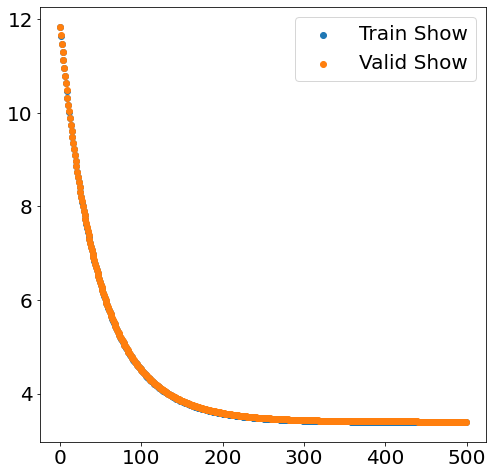

In [49]:
fig,ax=plt.subplots(figsize=(8,8))
plt.rcParams["font.size"]=20
plt.scatter(range(len(clf.loss)),clf.loss,label='Train Show')
plt.scatter(range(len(clf.val_loss)),clf.val_loss,label='Valid Show')
plt.legend();

In [54]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['Versicolor', 'Virginica']):
    
    # setting
    scatter_color = ['yellow', 'green']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

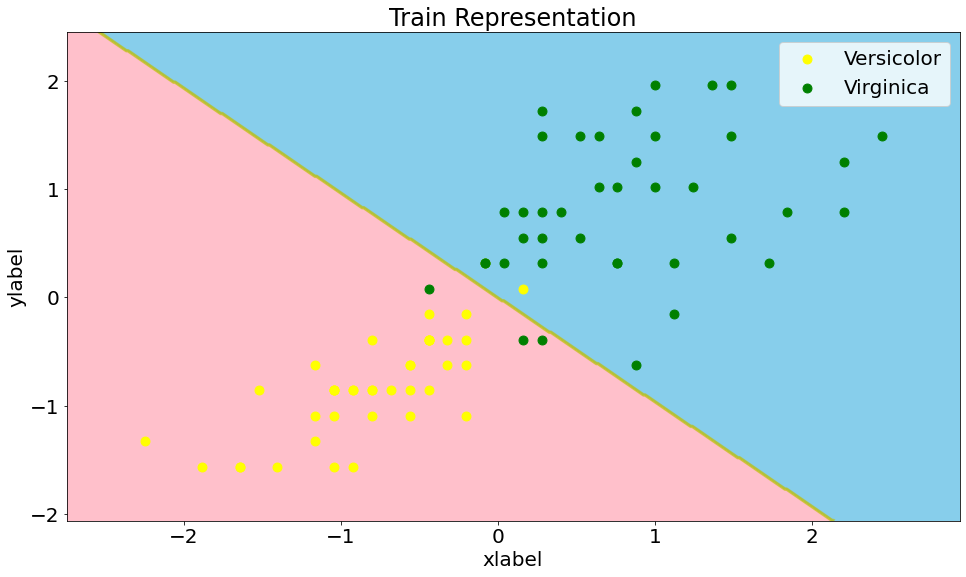

In [55]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='Train Representation')

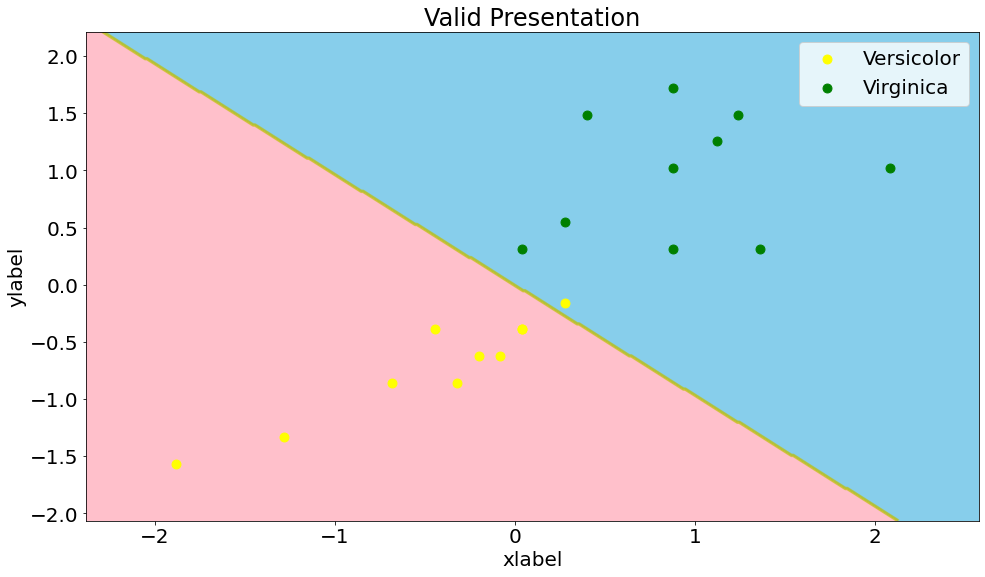

In [56]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='Valid Presentation')

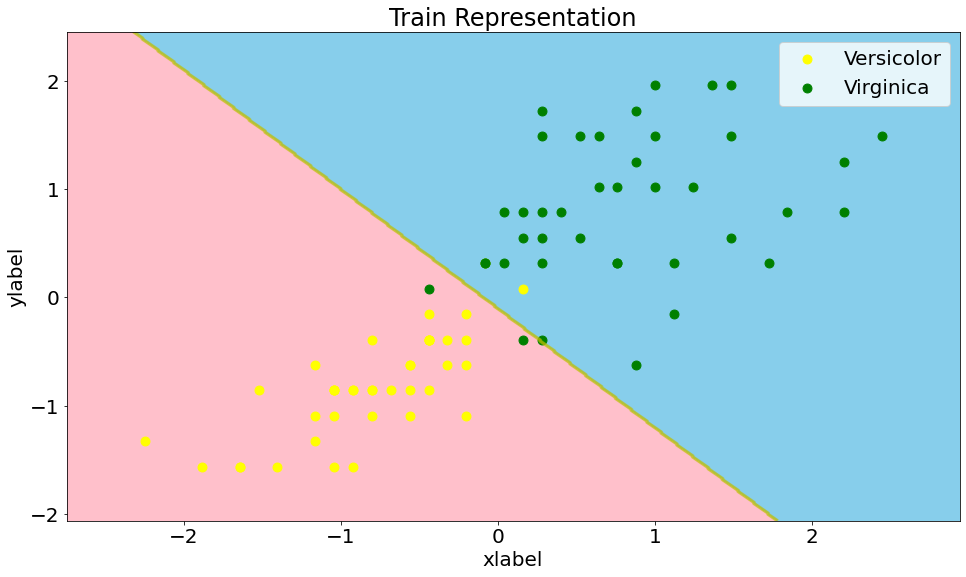

In [57]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='Train Representation')

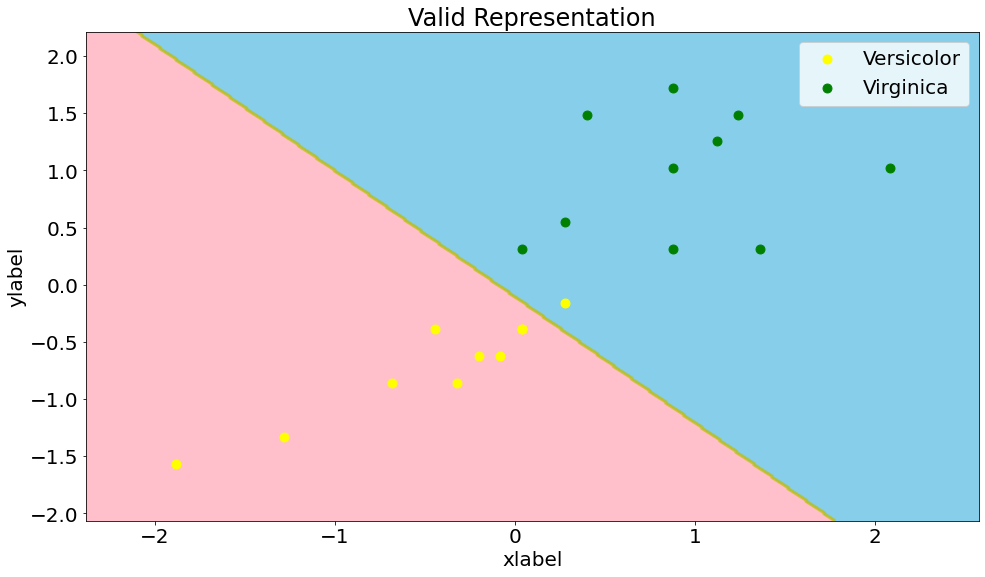

In [58]:
fit,ax=plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='Valid Representation')

In [59]:
np.load('theta.npy')

array([0.66147489, 0.23529802, 0.24343902])